# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

import folium
from folium import plugins
import plotly.express as px

# Load Dataset

In [ ]:
df1 = pd.read_csv("/content/covid_19_clean_complete.csv", parse_dates = ['Date'])
df1.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df1.shape

(49068, 10)

In [ ]:
df1.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
df1.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06
std,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04


In [ ]:
df2 = pd.read_csv("/content/country_vaccinations.csv", parse_dates = ['date'])
df2.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
df2.shape

(86512, 15)

In [ ]:
df2.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   43607 non-null  float64       
 4   people_vaccinated                    41294 non-null  float64       
 5   people_fully_vaccinated              38802 non-null  float64       
 6   daily_vaccinations_raw               35362 non-null  float64       
 7   daily_vaccinations                   86213 non-null  float64       
 8   total_vaccinations_per_hundred       43607 non-null  float64       
 9   people_vaccinated_per_hundred        41294 non-null  float64       
 10  people_ful

In [ ]:
df2.describe()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,86512,4.360700e+04,4.129400e+04,3.880200e+04,3.536200e+04,8.621300e+04,43607.000000,41294.000000,38802.000000,86213.000000
mean,2021-09-01 17:09:45.907157504,4.592964e+07,1.770508e+07,1.413830e+07,2.705996e+05,1.313055e+05,80.188543,40.927317,35.523243,3257.049157
min,2020-12-02 00:00:00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2021-05-27 00:00:00,5.264100e+05,3.494642e+05,2.439622e+05,4.668000e+03,9.000000e+02,16.050000,11.370000,7.020000,636.000000
50%,2021-09-04 00:00:00,3.590096e+06,2.187310e+06,1.722140e+06,2.530900e+04,7.343000e+03,67.520000,41.435000,31.750000,2050.000000
75%,2021-12-12 00:00:00,1.701230e+07,9.152520e+06,7.559870e+06,1.234925e+05,4.409800e+04,132.735000,67.910000,62.080000,4682.000000
max,2022-03-29 00:00:00,3.263129e+09,1.275541e+09,1.240777e+09,2.474100e+07,2.242429e+07,345.370000,124.760000,122.370000,117497.000000
std,NaN,2.246004e+08,7.078731e+07,5.713920e+07,1.212427e+06,7.682388e+05,67.913577,29.290759,28.376252,3934.312440


# Pre-processing

In [ ]:
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
df1[['Province/State']] = df1[['Province/State']].fillna('')
df1[cases] = df1[cases].fillna(0)

In [ ]:
df2.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [ ]:
df2.dropna(subset=['daily_vaccinations','daily_vaccinations_per_million'], inplace=True)

In [ ]:
mean_vaccinations = df2.groupby('country')['total_vaccinations'].transform('mean')
df2['total_vaccinations'].fillna(mean_vaccinations, inplace=True)

In [ ]:
mean_vaccinations = df2.groupby('country')['people_vaccinated'].transform('mean')
df2['people_vaccinated'].fillna(mean_vaccinations, inplace=True)

In [ ]:
mean_vaccinations = df2.groupby('country')['people_fully_vaccinated'].transform('mean')
df2['people_fully_vaccinated'].fillna(mean_vaccinations, inplace=True)

In [ ]:
mean_vaccinations = df2.groupby('country')['daily_vaccinations_raw'].transform('mean')
df2['daily_vaccinations_raw'].fillna(mean_vaccinations, inplace=True)

In [ ]:
mean_vaccinations = df2.groupby('country')['total_vaccinations_per_hundred'].transform('mean')
df2['total_vaccinations_per_hundred'].fillna(mean_vaccinations, inplace=True)

In [ ]:
mean_vaccinations = df2.groupby('country')['people_vaccinated_per_hundred'].transform('mean')
df2['people_vaccinated_per_hundred'].fillna(mean_vaccinations, inplace=True)

In [ ]:
mean_vaccinations = df2.groupby('country')['people_fully_vaccinated_per_hundred'].transform('mean')
df2['people_fully_vaccinated_per_hundred'].fillna(mean_vaccinations, inplace=True)

# Exploratory Data Analysis

## 1. Which country has the highest number of confirmed, active, recovered cases and deaths?

In [ ]:
confirmed_cases = pd.DataFrame(df1.groupby('Country/Region')['Confirmed'].sum())
confirmed_cases['Country/Region'] = confirmed_cases.index

death_cases = pd.DataFrame(df1.groupby('Country/Region')['Deaths'].sum())
death_cases['Country/Region'] = death_cases.index

recovered_cases = pd.DataFrame(df1.groupby('Country/Region')['Recovered'].sum())
recovered_cases['Country/Region'] = recovered_cases.index

active_cases = pd.DataFrame(df1.groupby('Country/Region')['Active'].sum())
active_cases['Country/Region'] = active_cases.index

<Axes: xlabel='Confirmed', ylabel='Country/Region'>

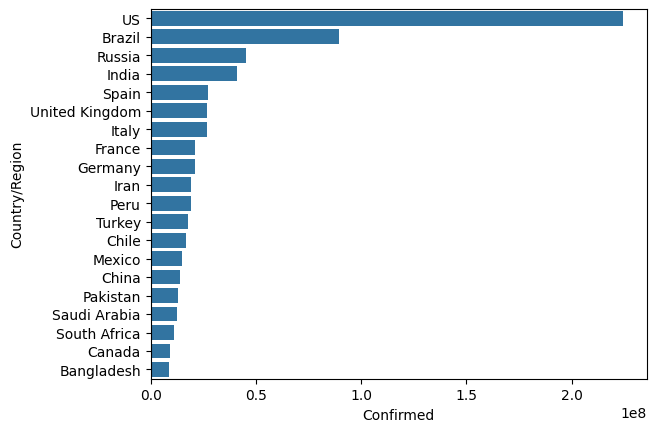

In [ ]:
sns.barplot(data=confirmed_cases.sort_values('Confirmed',ascending=False)[:20], y='Country/Region', x='Confirmed')

<Axes: xlabel='Deaths', ylabel='Country/Region'>

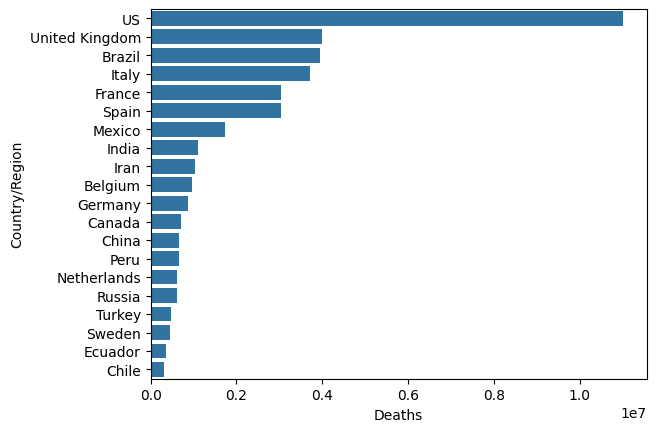

In [ ]:
sns.barplot(data=death_cases.sort_values('Deaths',ascending=False)[:20], y='Country/Region', x='Deaths')

<Axes: xlabel='Recovered', ylabel='Country/Region'>

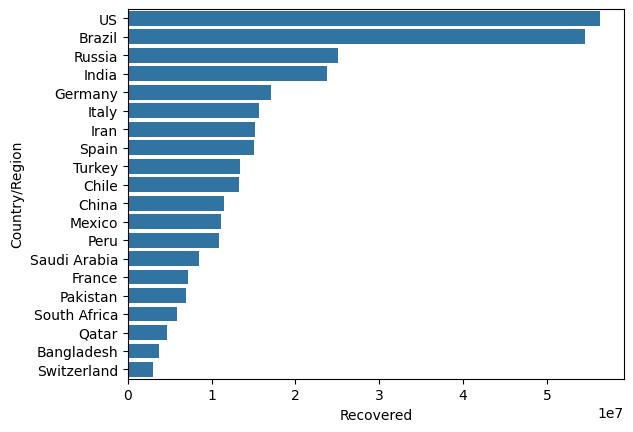

In [ ]:
sns.barplot(data=recovered_cases.sort_values('Recovered',ascending=False)[:20], y='Country/Region', x='Recovered')

<Axes: xlabel='Active', ylabel='Country/Region'>

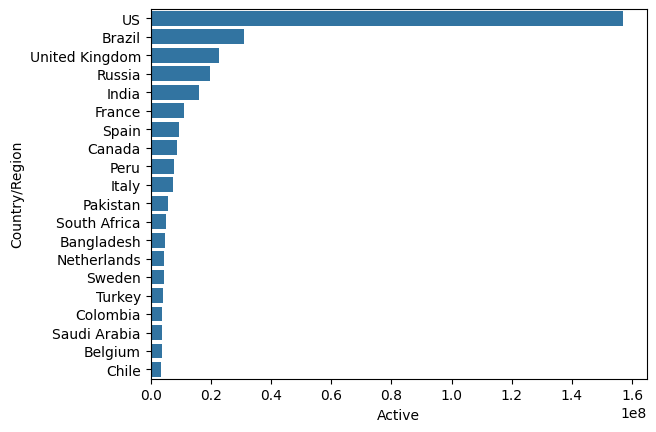

In [ ]:
sns.barplot(data=active_cases.sort_values('Active',ascending=False)[:20], y='Country/Region', x='Active')

- US is the most affected country. It tops all the categories.
- Brazil is the second most affected country but is much lesser than US
- UK has a low recovery rate compared to other countries
- Russia has a good recovery rate as no.of deaths are low and recovered cases are high.

## 2. How rapidly is the virus spreading?

(array([18293., 18322., 18353., 18383., 18414., 18444., 18475.]),
 [Text(18293.0, 0, '2020-02'),
  Text(18322.0, 0, '2020-03'),
  Text(18353.0, 0, '2020-04'),
  Text(18383.0, 0, '2020-05'),
  Text(18414.0, 0, '2020-06'),
  Text(18444.0, 0, '2020-07'),
  Text(18475.0, 0, '2020-08')])

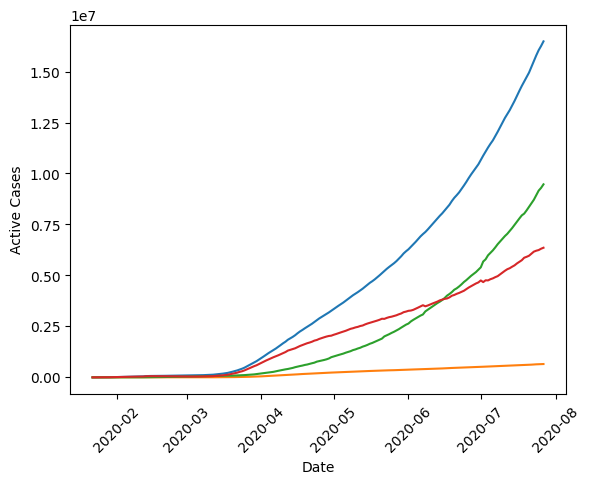

In [ ]:
time_data = df1.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()


plt.plot(time_data['Date'], time_data['Confirmed'])
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)

plt.plot(time_data['Date'], time_data['Deaths'])
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.xticks(rotation=45)

plt.plot(time_data['Date'], time_data['Recovered'])
plt.xlabel('Date')
plt.ylabel('Recovered Cases')
plt.xticks(rotation=45)

plt.plot(time_data['Date'], time_data['Active'])
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.xticks(rotation=45)

- The confirmed cases are rising exponentially.
- The no. of deaths is plateauing indicating that the health protocols and vaccines are effective.
- In the month of June, the number of recovered cases exceeded number of active cases.

## 3. Analysis of US

In [ ]:
grouped_US = df1[df1['Country/Region'] == "US"].reset_index()
grouped_US_date = grouped_US.groupby('Date')[['Confirmed', 'Deaths','Recovered','Active']].sum().reset_index()

(array([18293., 18322., 18353., 18383., 18414., 18444., 18475.]),
 [Text(18293.0, 0, '2020-02'),
  Text(18322.0, 0, '2020-03'),
  Text(18353.0, 0, '2020-04'),
  Text(18383.0, 0, '2020-05'),
  Text(18414.0, 0, '2020-06'),
  Text(18444.0, 0, '2020-07'),
  Text(18475.0, 0, '2020-08')])

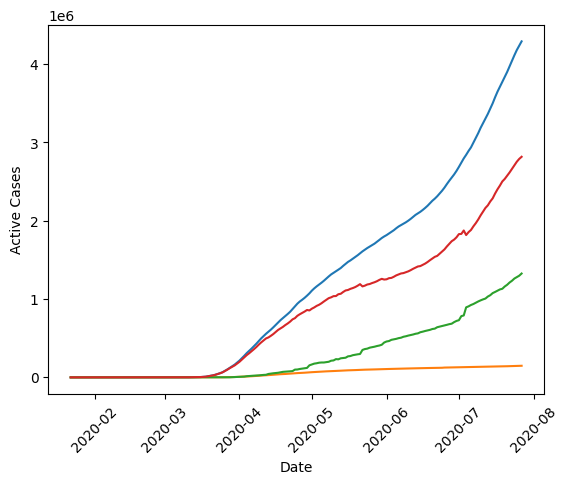

In [ ]:
plt.plot(grouped_US['Date'], grouped_US['Confirmed'])
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)

plt.plot(grouped_US['Date'], grouped_US['Deaths'])
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.xticks(rotation=45)

plt.plot(grouped_US['Date'], grouped_US['Recovered'])
plt.xlabel('Date')
plt.ylabel('Recovered Cases')
plt.xticks(rotation=45)

plt.plot(grouped_US['Date'], grouped_US['Active'])
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.xticks(rotation=45)

In [ ]:
latitude = 37.0902
longitude = -95.7129
world_map = folium.Map(location=[latitude, longitude], zoom_start=6, tiles='Stamen Toner')

for lat, lon, confirmed, deaths, recovered, name in zip(grouped_US['Lat'], grouped_US['Long'], grouped_US['Confirmed'], grouped_US['Deaths'], grouped_US['Recovered'], grouped_US['Country/Region']):
    lat += random.uniform(-10, 10)
    lon += random.uniform(-10, 10)

    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(confirmed) + '<br>'
                                '<strong>Recovered Cases</strong>: ' + str(recovered) +'<br>'
                                '<strong>Deaths Cases</strong>: ' + str(deaths) +'<br>'),
                        color='red',
                        fill_color='red',
                        fill_opacity=0.7).add_to(world_map)

world_map

- The number of confirmed cases has exceeded 4 million.
- The number of active cases is on the rise.
- The death toll has reached 150000.

## 4. Spread of the virus over time

In [ ]:
global_df = df1.groupby(['Date', 'Country/Region'])[['Confirmed', 'Deaths']].max()
global_df = global_df.reset_index()
global_df['Date'] = pd.to_datetime(global_df['Date'])
global_df['Date'] = global_df['Date'].dt.strftime('%m/%d/%Y')
global_df['size'] = global_df['Confirmed'].pow(0.3)

fig = px.scatter_geo(global_df, locations="Country/Region", locationmode='country names',
                     color="Confirmed", size='size', hover_name="Country/Region",
                     range_color= [0, 1500],
                     projection="natural earth", animation_frame="Date",
                     title='COVID-19: Spread Over Time', color_continuous_scale="portland")
fig.show()

## 5. What are the most widely used vaccines?

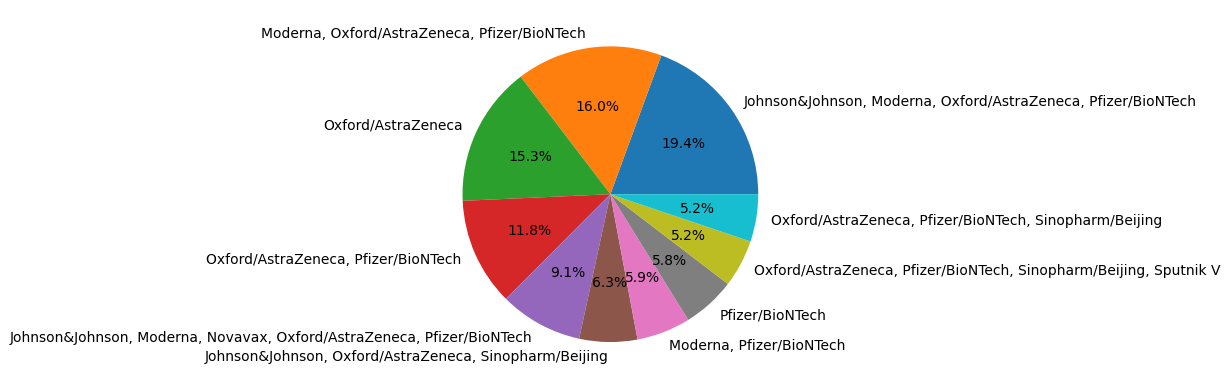

In [ ]:
vaccines = df2['vaccines'].value_counts()[:10]
plt.pie(vaccines.values, labels=vaccines.index, autopct='%1.1f%%');

Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech are majorly used.

## 6. Which country is most proactive in vaccinations?

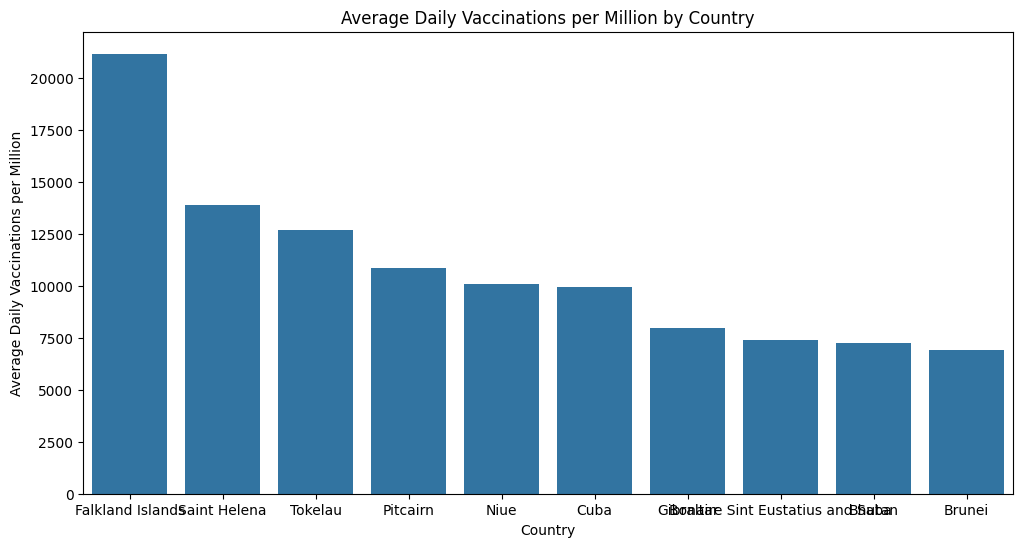

In [ ]:
grouped_df = df2.groupby('country')['daily_vaccinations_per_million'].mean().reset_index()
grouped_df = grouped_df.sort_values(by="daily_vaccinations_per_million")[-1:-11:-1]

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='country', y='daily_vaccinations_per_million')
plt.title('Average Daily Vaccinations per Million by Country')
plt.xlabel('Country')
plt.ylabel('Average Daily Vaccinations per Million')
plt.show()

# Forecasting

In [ ]:
df = df2[df2['country'] == 'United States'][['date','total_vaccinations_per_hundred']]
df.set_index('date', inplace=True)
df_daily = df.groupby('date').sum()['total_vaccinations_per_hundred']

In [ ]:
train_set = df_daily.iloc[:int(0.8*len(df_daily))]
test_set = df_daily.iloc[int(0.8*len(df_daily)):]
print(len(test_set))

94


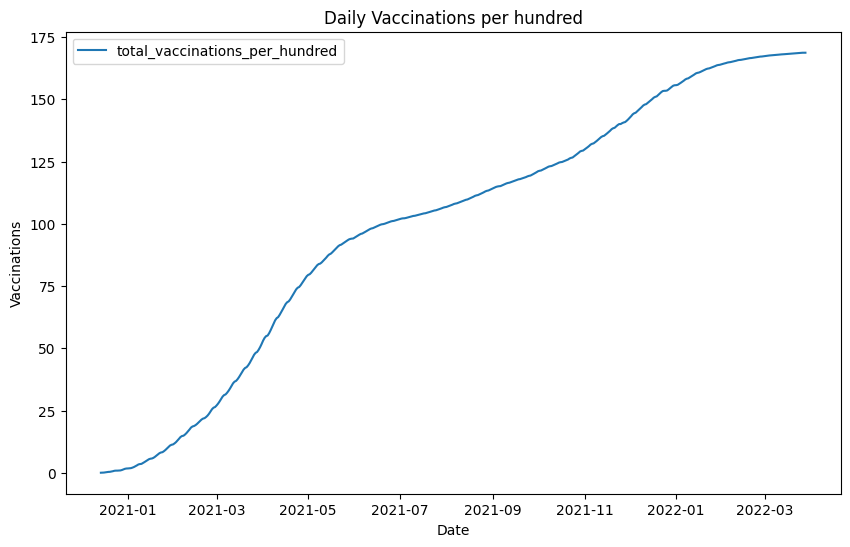

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_daily, label='total_vaccinations_per_hundred')
plt.title('Daily Vaccinations per hundred')
plt.xlabel('Date')
plt.ylabel('Vaccinations')
plt.legend()
plt.show()

## ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_set, order=(2, 0, 2))
arima_result = arima_model.fit()
print(arima_result.summary())

arima_forecast = arima_result.forecast(steps=94)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                     SARIMAX Results                                      
Dep. Variable:     total_vaccinations_per_hundred   No. Observations:                  376
Model:                             ARIMA(2, 0, 2)   Log Likelihood                 194.623
Date:                            Fri, 31 May 2024   AIC                           -377.246
Time:                                    04:55:52   BIC                           -353.668
Sample:                                12-14-2020   HQIC                          -367.887
                                     - 12-24-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.3679     18.666      4.681      0.000      50.784     123.952
ar.L1          1.9990      0.001   

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



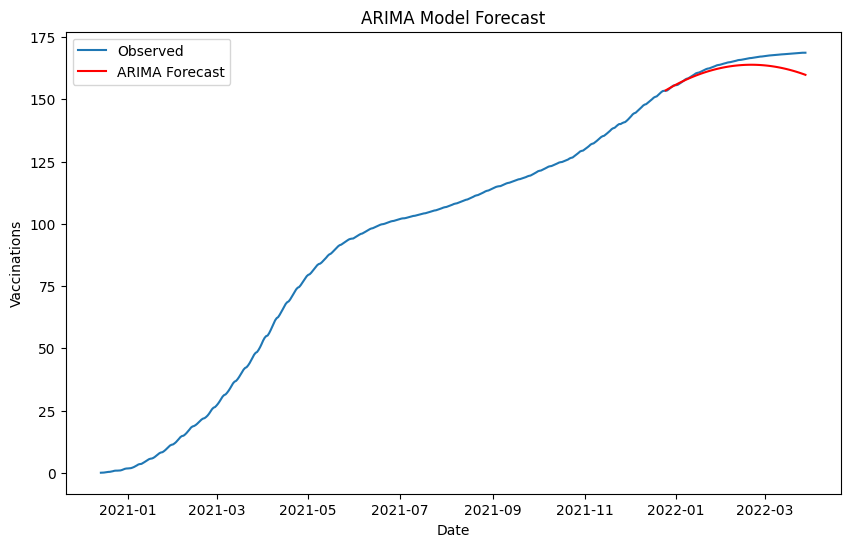

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_daily, label='Observed')
plt.plot(arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Vaccinations')
plt.legend()
plt.show()

## SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_model = SARIMAX(train_set, order=(5, 1, 5), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False)
sarimax_result = sarimax_model.fit()
print(sarimax_result.summary())

sarimax_forecast = sarimax_result.get_forecast(steps=94)
sarimax_conf_int = sarimax_forecast.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                      SARIMAX Results                                       
Dep. Variable:       total_vaccinations_per_hundred   No. Observations:                  376
Model:             SARIMAX(5, 1, 5)x(1, 1, [1], 12)   Log Likelihood                 339.055
Date:                              Fri, 31 May 2024   AIC                           -652.110
Time:                                      04:56:35   BIC                           -602.144
Sample:                                  12-14-2020   HQIC                          -632.211
                                       - 12-24-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8008      0.017    104.788      0.000       1.767       1.834
ar.L2         -2.24

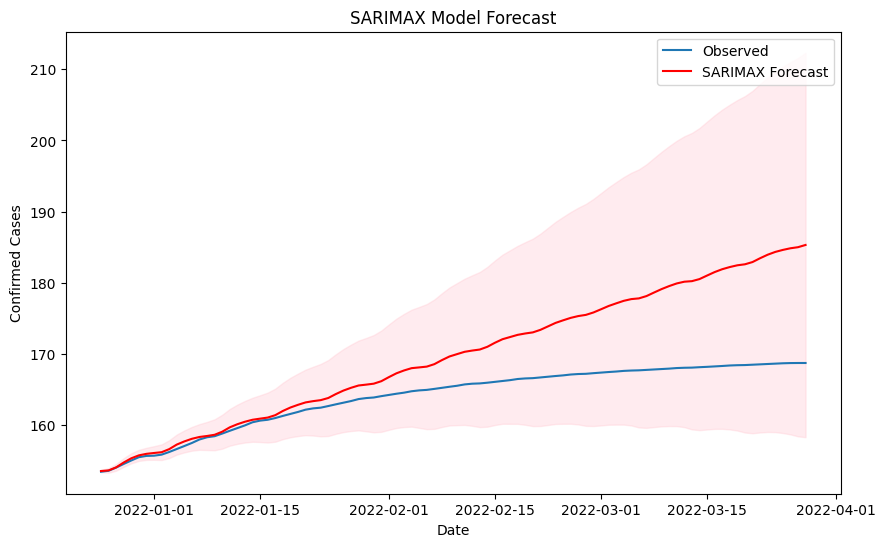

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_set, label='Observed')
plt.plot(sarimax_forecast.predicted_mean, label='SARIMAX Forecast', color='red')
plt.fill_between(sarimax_conf_int.index,
                 sarimax_conf_int.iloc[:, 0],
                 sarimax_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMAX Model Forecast')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

## LSTM and BiLSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = pd.DataFrame(df_daily)

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_scaled, columns=['total_vaccinations_per_hundred'])

In [97]:
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30
X, y = create_sequences(data_scaled.values, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X, y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
14/14 [==============================] - 7s 25ms/step - loss: 0.0684
Epoch 2/100
14/14 [==============================] - 1s 49ms/step - loss: 0.0076
Epoch 3/100
14/14 [==============================] - 1s 58ms/step - loss: 0.0027
Epoch 4/100
14/14 [==============================] - 1s 48ms/step - loss: 8.9613e-04
Epoch 5/100
14/14 [==============================] - 1s 49ms/step - loss: 3.2737e-04
Epoch 6/100
14/14 [==============================] - 1s 47ms/step - loss: 1.6609e-04
Epoch 7/100
14/14 [==============================] - 1s 49ms/step - loss: 1.5731e-04
Epoch 8/100
14/14 [==============================] - 1s 46ms/step - loss: 1.5407e-04
Epoch 9/100
14/14 [==============================] - 1s 56ms/step - loss: 1.5277e-04
Epoch 10/100
14/14 [==============================] - 1s 47ms/step - loss: 1.4598e-04
Epoch 11/100
14/14 [==============================] - 1s 42ms/step - loss: 1.4469e-04
Epoch 12/100
14/14 [==============================] - 1s 47ms/step - loss: 

In [99]:
from tensorflow.keras.layers import Bidirectional

# BiLSTM model
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(time_step, 1)))
model_bilstm.add(Bidirectional(LSTM(50, return_sequences=False)))
model_bilstm.add(Dense(1))
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')

model_bilstm.fit(X, y, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
14/14 [==============================] - 10s 78ms/step - loss: 0.0519
Epoch 2/100
14/14 [==============================] - 1s 45ms/step - loss: 0.0065
Epoch 3/100
14/14 [==============================] - 1s 48ms/step - loss: 0.0014
Epoch 4/100
14/14 [==============================] - 1s 44ms/step - loss: 6.8654e-04
Epoch 5/100
14/14 [==============================] - 1s 45ms/step - loss: 4.3106e-04
Epoch 6/100
14/14 [==============================] - 1s 46ms/step - loss: 3.7665e-04
Epoch 7/100
14/14 [==============================] - 1s 44ms/step - loss: 3.7200e-04
Epoch 8/100
14/14 [==============================] - 1s 47ms/step - loss: 3.6298e-04
Epoch 9/100
14/14 [==============================] - 1s 45ms/step - loss: 3.5383e-04
Epoch 10/100
14/14 [==============================] - 1s 44ms/step - loss: 3.4798e-04
Epoch 11/100
14/14 [==============================] - 1s 45ms/step - loss: 3.4984e-04
Epoch 12/100
14/14 [==============================] - 1s 44ms/step - loss:

In [100]:
def forecast(model, data, time_step):
    temp_input = list(data[-time_step:])
    temp_input = [x[0] for x in temp_input]
    lst_output = []
    n_steps = 30
    i = 0
    while (i < n_steps):
        if len(temp_input) > time_step:
            temp_input = temp_input[1:]
        temp_input_scaled = np.array(temp_input).reshape((1, time_step, 1))
        yhat = model.predict(temp_input_scaled, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1
    return lst_output

lstm_forecast = forecast(model, data_scaled.values, time_step)
bilstm_forecast = forecast(model_bilstm, data_scaled.values, time_step)

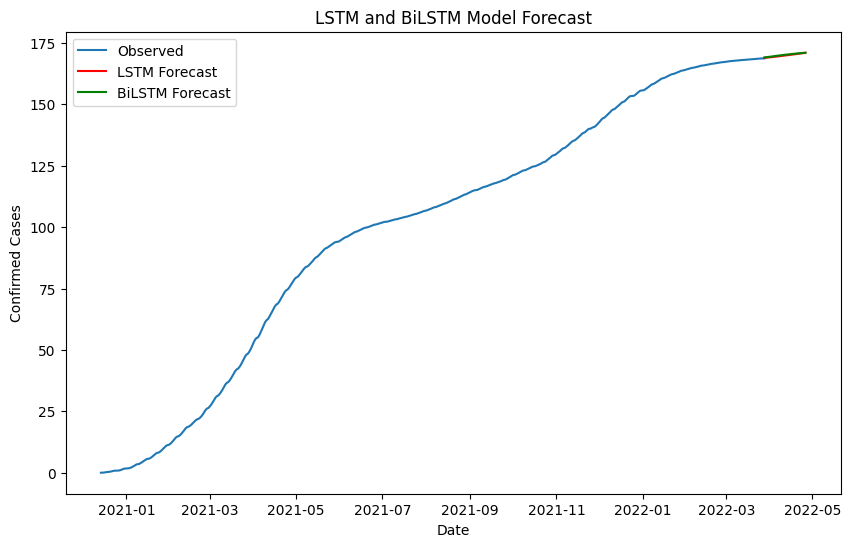

In [101]:
lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1))
bilstm_forecast = scaler.inverse_transform(np.array(bilstm_forecast).reshape(-1, 1))

forecast_dates = pd.date_range(start= data.index[-1], periods=30)
plt.figure(figsize=(10, 6))
plt.plot(data.index, df_daily, label='Observed')
plt.plot(forecast_dates, lstm_forecast, label='LSTM Forecast', color='red')
plt.plot(forecast_dates, bilstm_forecast, label='BiLSTM Forecast', color='green')
plt.title('LSTM and BiLSTM Model Forecast')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

In [102]:
arima_forecast = arima_result.forecast(steps=30)
sarimax_forecast = sarimax_result.forecast(steps=30)

# Results

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_forecast(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    return mae, rmse

true_values = df_daily[-30:].values

arima_mae, arima_rmse = evaluate_forecast(true_values, arima_forecast)
sarimax_mae, sarimax_rmse = evaluate_forecast(true_values, sarimax_forecast)
lstm_mae, lstm_rmse = evaluate_forecast(true_values, lstm_forecast)
bilstm_mae, bilstm_rmse = evaluate_forecast(true_values, bilstm_forecast)

print(f"ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}")
print(f"SARIMAX MAE: {sarimax_mae}, RMSE: {sarimax_rmse}")
print(f"LSTM MAE: {lstm_mae}, RMSE: {lstm_rmse}")
print(f"BiLSTM MAE: {bilstm_mae}, RMSE: {bilstm_rmse}")

ARIMA MAE: 10.166408300539706, RMSE: 10.338137920484845
SARIMAX MAE: 9.38090458743961, RMSE: 9.724729904508076
LSTM MAE: 1.8408584391276028, RMSE: 1.8491151751775086
BiLSTM MAE: 2.066179382324217, RMSE: 2.070146517243779
